Project Name - Unemployment Analysis with Python


Name - Mitali Salunkhe

task no. 2

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:

df1=pd.read_csv("Unemployment in India.csv")

In [3]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df1[' Date'] = pd.to_datetime(df1[' Date'], dayfirst=True)
# Find the maximum date
max_date = df1[' Date'].max()

print(f"The maximum date is: {max_date}")

The maximum date is: 2020-06-30 00:00:00


In [47]:
min_date = df1[' Date'].min()

print(f"The maximum date is: {min_date}")

The maximum date is: 2019-05-31 00:00:00



and in df1: "Unemployment in India.csv" the records are tfrom 2019-05-31 to 2020-06-30

In [48]:
df1.shape

(768, 7)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [50]:
df1.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [51]:
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [52]:
df=df1.dropna()

In [53]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [54]:
df.shape

(740, 7)

In [75]:
#rename columns for easier understanding and accesing

df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']
     

In [56]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region'],
      dtype='object')

In [57]:

# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in States is 28
No. of unique values in Date is 14
No. of unique values in Frequency is 2
No. of unique values in Estimated Unemployment Rate is 624
No. of unique values in Estimated Employed is 740
No. of unique values in Estimated Labour Participation Rate is 626
No. of unique values in Region is 2


In [58]:

# Convert the 'Frequency' column to a categorical data type
df['Frequency'] = df['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
df['Region'] = df['Region'].astype('category')

C:\Users\mital\AppData\Local\Temp\ipykernel_14852\1671012199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency'] = df['Frequency'].astype('category')
C:\Users\mital\AppData\Local\Temp\ipykernel_14852\1671012199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Region'].astype('category')


In [63]:
# create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()

In [64]:
# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
range = (df['Date'] <= '2020-03-30')

# Use the range to select and keep only the rows that meet the date range criteria
df_bld = df.loc[range]

In [65]:
# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period and after lockdown
range2 = (df_ld['Date'] >= '2020-03-31')

# Use the range to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[range2]

In [66]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region'],
      dtype='object')

Region Wise Estimated Unemployment Rate

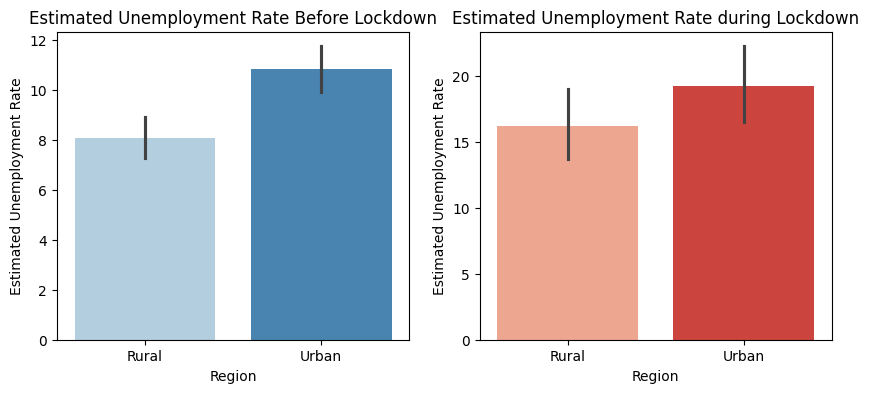

In [71]:

# Create a figure with two subplots side by side.
plt.figure(figsize=(10, 4))

# First subplot for Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)
sns.barplot(x='Region', y='Estimated Unemployment Rate', hue='Region', data=df_bld, palette='Blues', dodge=False, legend=False)
plt.title('Estimated Unemployment Rate Before Lockdown')

# Second subplot for Estimated Unemployment Rate After Lockdown
plt.subplot(1, 2, 2)
sns.barplot(x='Region', y='Estimated Unemployment Rate', hue='Region', data=df_ld, palette='Reds', dodge=False, legend=False)
plt.title('Estimated Unemployment Rate during Lockdown')

plt.show()



from the above bar plot we can say that the unemployment rate in urban area was more than in rural area before and after lockdown and its much higher during lockdown


Bar Plot for State Wise Estimated Unemployment Rate

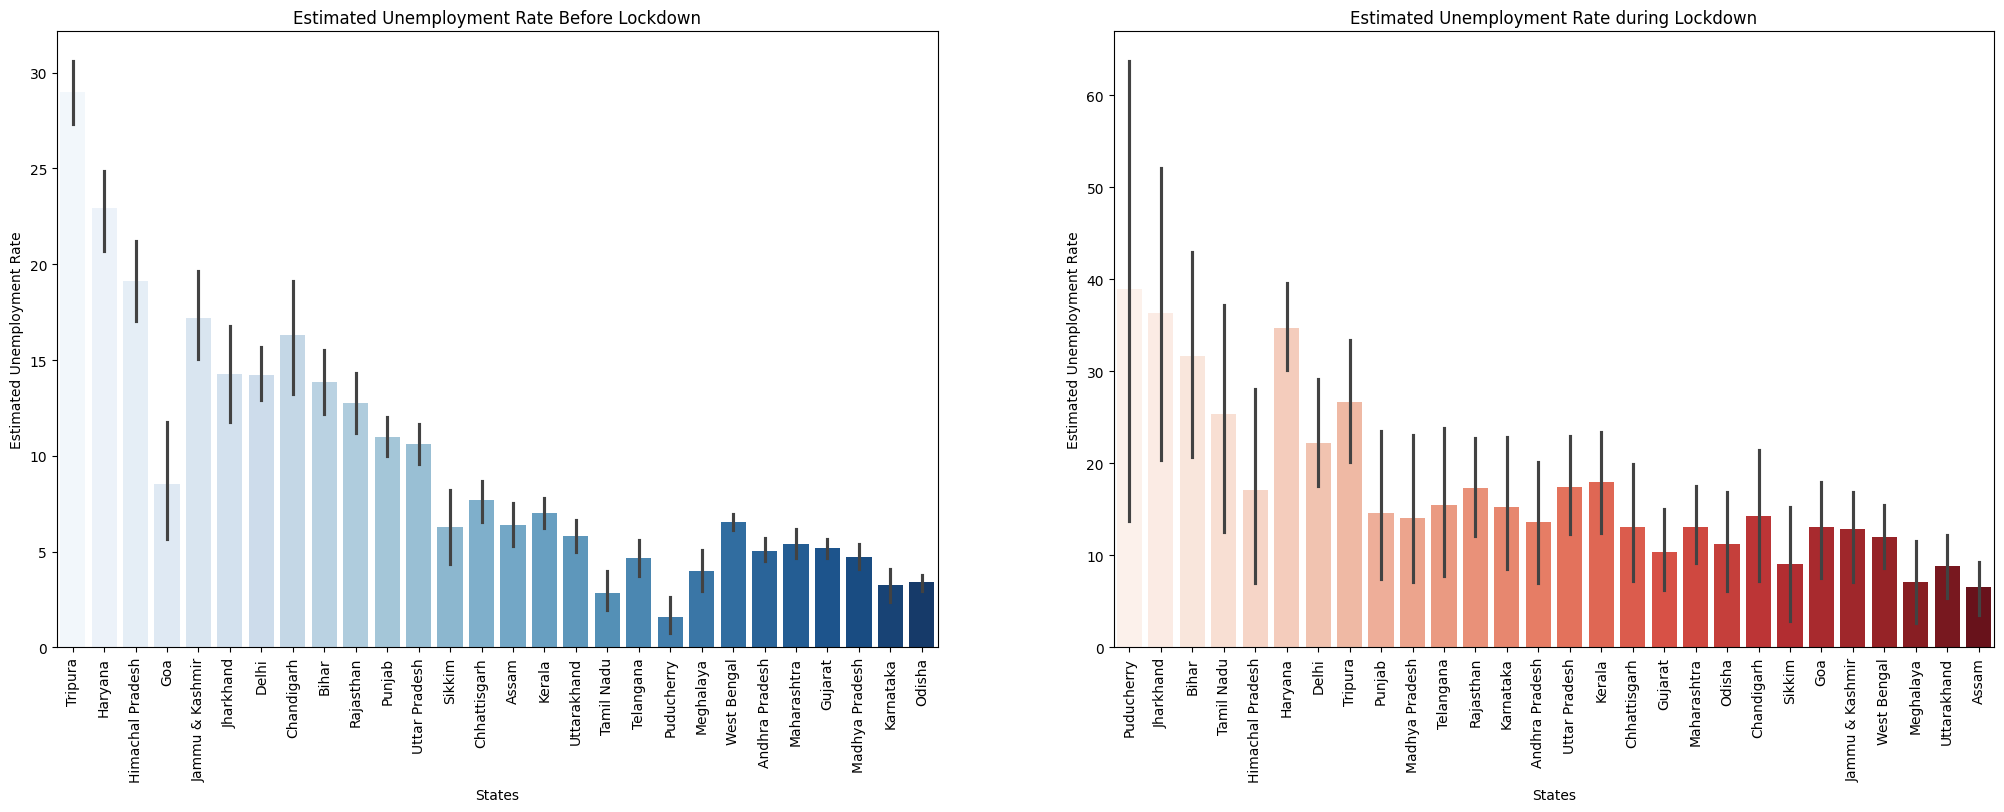

In [72]:

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# First subplot for Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
sns.barplot(x='States', y='Estimated Unemployment Rate',hue="States", data=df_bld.sort_values(by='Estimated Unemployment Rate', ascending=False),palette="Blues")
plt.title('Estimated Unemployment Rate Before Lockdown')

# Second subplot for Estimated Unemployment Rate After Lockdown
plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='States', y='Estimated Unemployment Rate',hue="States", data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), palette="Reds")
plt.title('Estimated Unemployment Rate during Lockdown')

plt.show()



from above plots we can conclude that Estimated Unemployment Rate before Lockdown was highest in tripura and lowest in odisha. Estimated Unemployment Rate during Lockdown was highest in puducherry and lowest in assam. 

Bar Plot for State Wise Estimated Employed

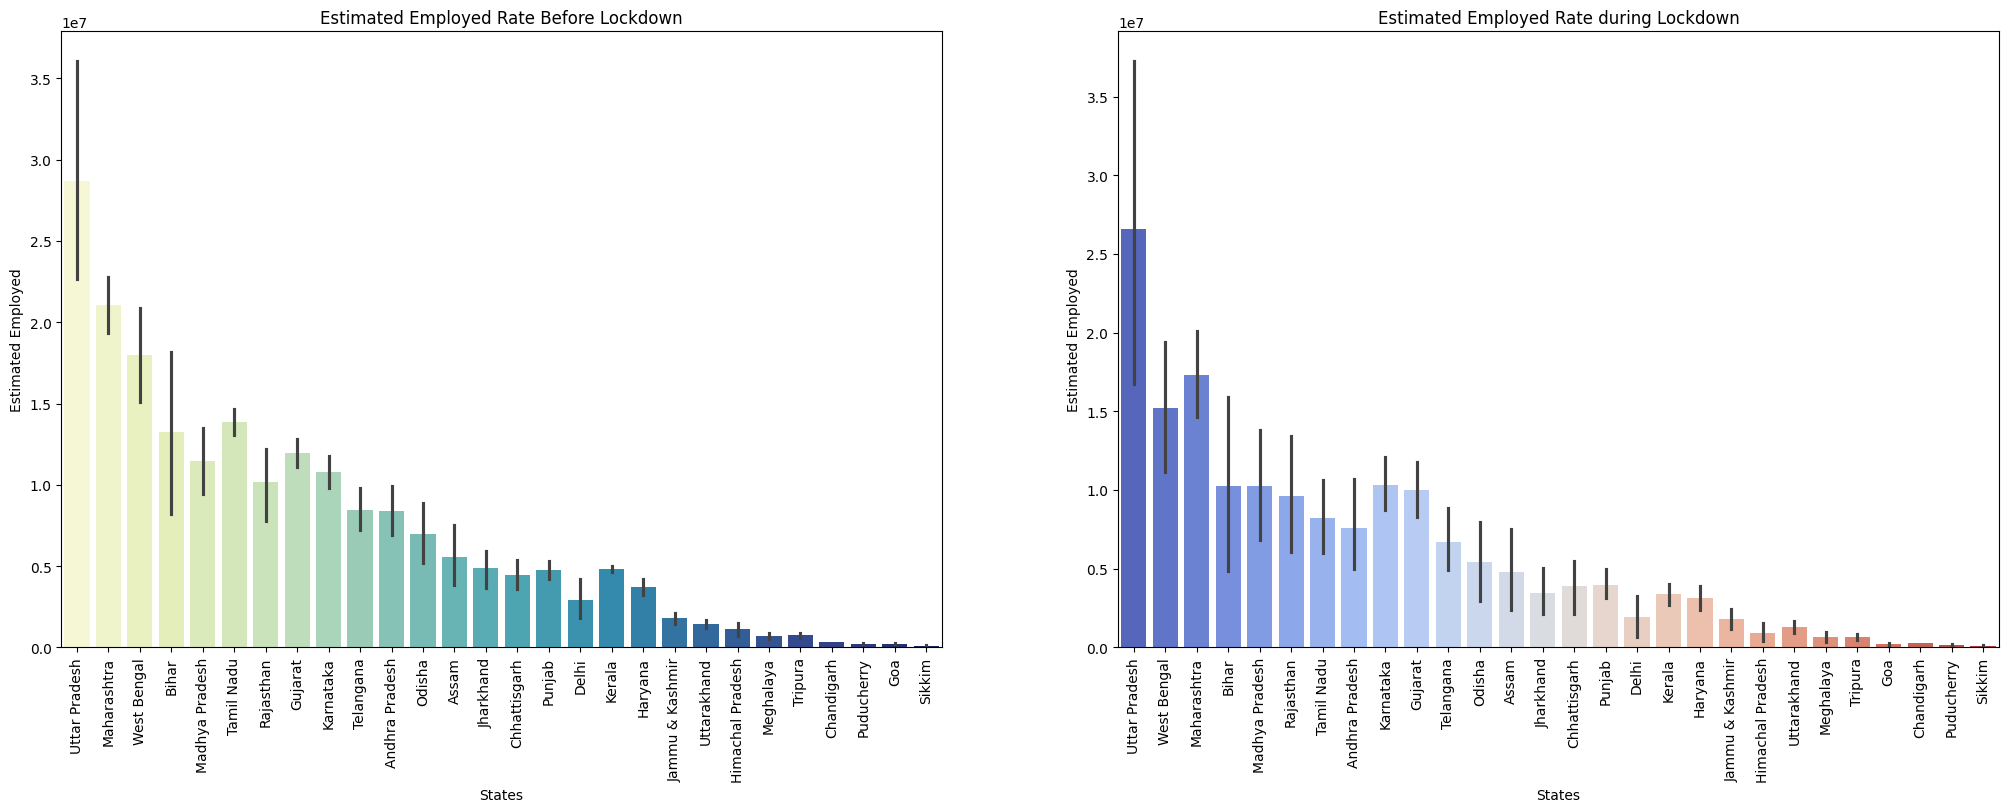

In [73]:

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# First subplot for Estimated employment Rate Before Lockdown
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
sns.barplot(x='States', y='Estimated Employed', hue="States",data=df_bld.sort_values(by='Estimated Employed', ascending=False),palette="YlGnBu")
plt.title('Estimated Employed Rate Before Lockdown')

# Second subplot for Estimated employment Rate After Lockdown
plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='States', y='Estimated Employed',hue="States", data=df_ld.sort_values(by='Estimated Employed', ascending=False), palette="coolwarm")
plt.title('Estimated Employed Rate during Lockdown')

plt.show()



from above plots we can say that Estimated employment Rate before and during Lockdown was highest in uttar pradesh and lowest in sikkim. 

State Wise Estimated Labour Participation Rate

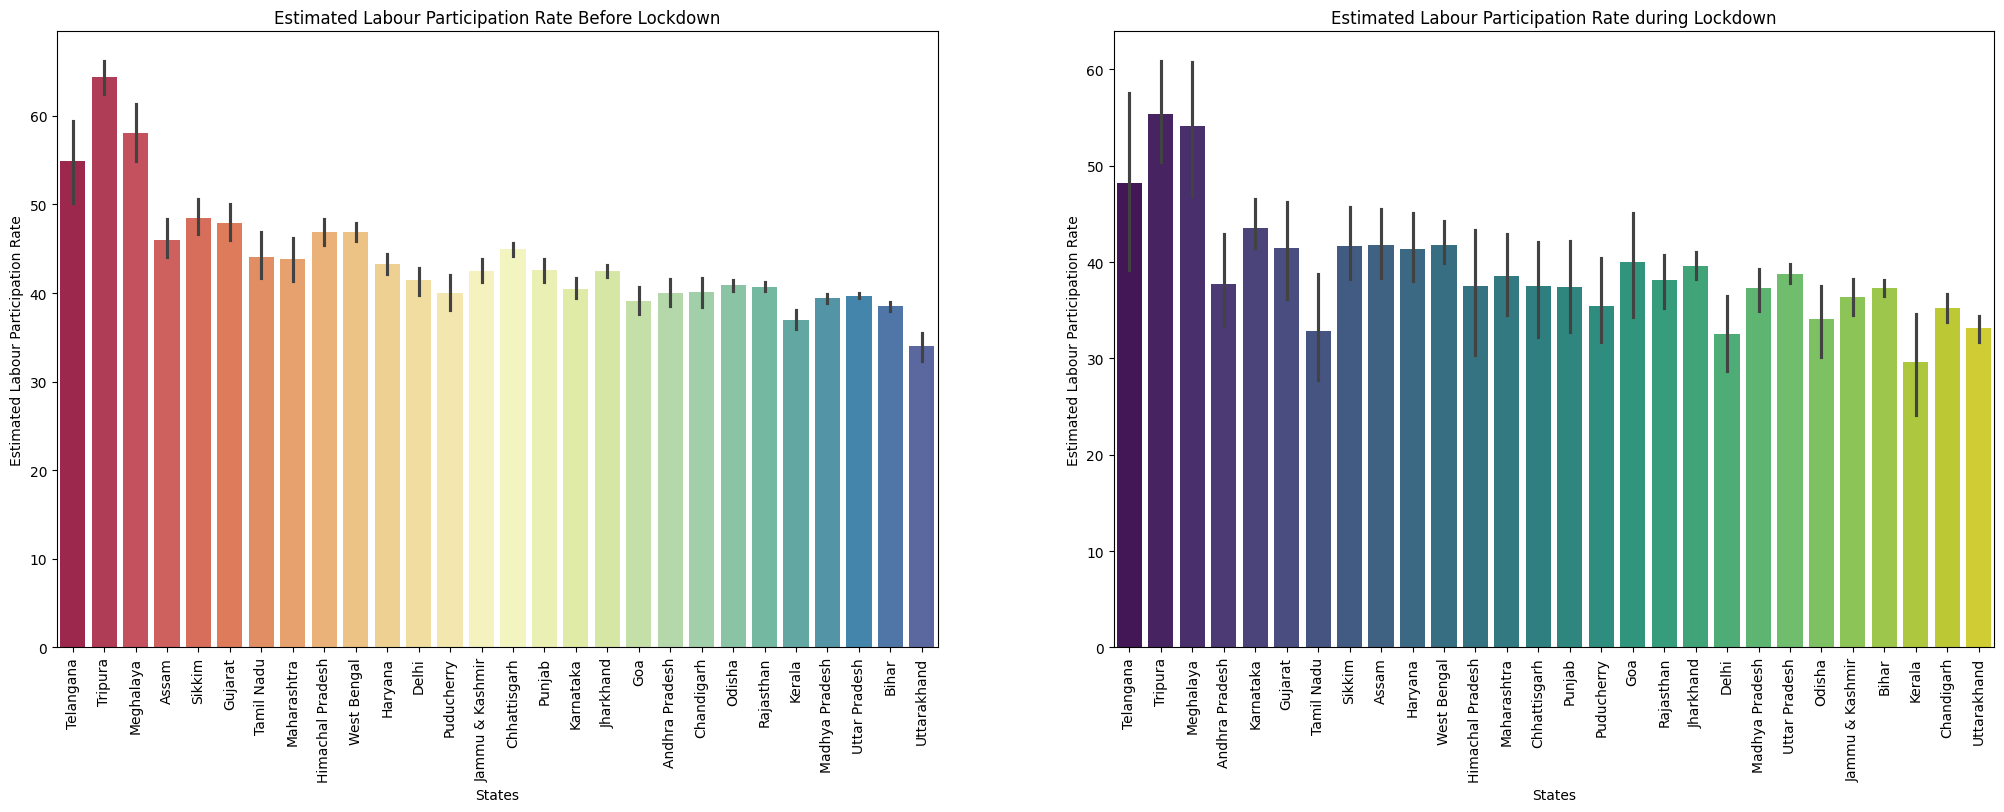

In [74]:

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# First subplot for Estimated employment Rate Before Lockdown
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
sns.barplot(x='States', y='Estimated Labour Participation Rate',hue="States", data=df_bld.sort_values(by='Estimated Labour Participation Rate', ascending=False),palette="Spectral")
plt.title('Estimated Labour Participation Rate Before Lockdown')

# Second subplot for Estimated employment Rate After Lockdown
plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='States', y='Estimated Labour Participation Rate',hue="States", data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), palette="viridis")
plt.title('Estimated Labour Participation Rate during Lockdown')

plt.show()



From the above charts we got to know that, states like: Telangana, Tripura, Meghalaya and Assam are in top for Estimated Labour Participation Rate, on before lockdown time. And Meghalaya, Telangana, Tripura and Andhra Pradesh are in top, during the lockdown time for Estimated Labour Participation Rate.